# Import des librairies et chargement des données

In [1]:
import os

# grammaire abstraite de l'arbre syntaxique de Python
import ast

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype, is_numeric_dtype

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
dossier_data = "data/"
nom_fichier = "batiments_data.csv"
batiments_data = pd.read_csv(dossier_data+nom_fichier)

In [3]:
pd.set_option("display.max_columns", None)
batiments_data.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding,ENERGYSTARScore,SiteEnergyUse,SteamUse,Electricity,NaturalGas,OtherFuelUse,GHGEmissions,BuildingAge,IsSteamUser,IsElectricityUser,IsNaturalGasUser,IsOtherFuelUser,NumberOfUsedEnergies,MostUsedEnergy,GatheredPrimaryPropertyType,LogSiteEnergyUse,LogGHGEmissions
0,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,961990.0,18.0,73130656.0,19660404.0,49762435.0,3709900.0,0.0,2061.48,46,1.0,1.0,1.0,0.0,3.0,Electricity,Hotel,18.107758,7.631664
1,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,61320.0,1.0,28229320.0,23458518.0,2769023.0,2001894.0,0.0,1936.34,89,1.0,1.0,1.0,0.0,3.0,Steam,Hotel,17.155872,7.569071
2,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,107430.0,67.0,14829099.0,0.0,6066245.0,8763105.0,0.0,507.70,35,0.0,1.0,1.0,0.0,2.0,NaturalGas,Hotel,16.512102,6.231858
3,19,NonResidential,Hotel,DOWNTOWN,1922,1.0,11.0,67390.0,14.0,10711451.0,4403788.0,4089407.0,2218425.0,0.0,486.25,93,1.0,1.0,1.0,0.0,3.0,Steam,Hotel,16.186824,6.188777
4,25,NonResidential,Hotel,DOWNTOWN,1916,1.0,10.0,104352.0,83.0,7845112.0,3205497.0,1790665.0,2849024.0,0.0,411.22,99,1.0,1.0,1.0,0.0,3.0,Steam,Hotel,15.875401,6.021557


# Sélection des variables finales

In [4]:
batiments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OSEBuildingID                2320 non-null   int64  
 1   BuildingType                 2320 non-null   object 
 2   PrimaryPropertyType          2320 non-null   object 
 3   Neighborhood                 2320 non-null   object 
 4   YearBuilt                    2320 non-null   int64  
 5   NumberofBuildings            2320 non-null   float64
 6   NumberofFloors               2311 non-null   float64
 7   PropertyGFABuilding          2318 non-null   float64
 8   ENERGYSTARScore              1532 non-null   float64
 9   SiteEnergyUse                2320 non-null   float64
 10  SteamUse                     2320 non-null   float64
 11  Electricity                  2320 non-null   float64
 12  NaturalGas                   2320 non-null   float64
 13  OtherFuelUse      

In [5]:
variables_ecartees = ["OSEBuildingID", "PrimaryPropertyType", "ENERGYSTARScore", "YearBuilt", "SteamUse", "Electricity",
                      "NaturalGas", "OtherFuelUse", "SiteEnergyUse", "GHGEmissions", "IsSteamUser", "IsElectricityUser",
                      "IsNaturalGasUser", "IsOtherFuelUser", "MostUsedEnergy"]
batiments_data_modeles = batiments_data.drop(columns=variables_ecartees)

# Préparation des données

In [6]:
batiments_data_modeles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BuildingType                 2320 non-null   object 
 1   Neighborhood                 2320 non-null   object 
 2   NumberofBuildings            2320 non-null   float64
 3   NumberofFloors               2311 non-null   float64
 4   PropertyGFABuilding          2318 non-null   float64
 5   BuildingAge                  2320 non-null   int64  
 6   NumberOfUsedEnergies         2320 non-null   float64
 7   GatheredPrimaryPropertyType  2320 non-null   object 
 8   LogSiteEnergyUse             2320 non-null   float64
 9   LogGHGEmissions              2320 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 181.4+ KB


## Séparation du dataset en training et test sets

Cette séparation sera faite deux fois : 
- la première pour la consommation d'énergie totale
- la seconde pour les émissions de GES

In [7]:
X = batiments_data_modeles.drop(columns=["LogSiteEnergyUse", "LogGHGEmissions"])
y_conso_energie = batiments_data_modeles["LogSiteEnergyUse"]
y_emissions = batiments_data_modeles["LogGHGEmissions"]

In [8]:
from sklearn.model_selection import train_test_split

# Séparation pour la consommation d'énergie
X_conso_train, X_conso_test, y_conso_train, y_conso_test = train_test_split(X, y_conso_energie)

# Séparation pour les émissions de GES
X_emissions_train, X_emissions_test, y_emissions_train, y_emissions_test = train_test_split(X, y_emissions)

## Encodage des variables catégorielles

In [9]:
# Identification des variables catégorielles (celles dont le type est object)
s = (X.dtypes == 'object')
variables_categorielles = list(s[s].index)

In [10]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

############################################################################################
#                                   Consommation d'énergie
############################################################################################

# On encode chaque modalité des variables catégorielles par 1 ou 0 (présence ou absence de la modalité)
OH_X_conso_train = pd.DataFrame(OH_encoder.fit_transform(X_conso_train[variables_categorielles]))
OH_X_conso_test = pd.DataFrame(OH_encoder.transform(X_conso_test[variables_categorielles]))

# Remise en forme des datasets encodés, remise des noms des colonnes et des index
OH_X_conso_train.columns = OH_encoder.get_feature_names(variables_categorielles)
OH_X_conso_test.columns = OH_encoder.get_feature_names(variables_categorielles)

OH_X_conso_train.index = X_conso_train.index
OH_X_conso_test.index = X_conso_test.index

# Suppression des variables catégorielles et remplacement par les variables encodées
num_X_conso_train = X_conso_train.drop(columns=variables_categorielles)
num_X_conso_test = X_conso_test.drop(columns=variables_categorielles)

OH_X_conso_train = pd.concat([num_X_conso_train, OH_X_conso_train], axis=1)
OH_X_conso_test = pd.concat([num_X_conso_test, OH_X_conso_test], axis=1)

############################################################################################
#                                   Emissions de GES
############################################################################################

# On encode chaque modalité des variables catégorielles par 1 ou 0 (présence ou absence de la modalité)
OH_X_emissions_train = pd.DataFrame(OH_encoder.fit_transform(X_emissions_train[variables_categorielles]))
OH_X_emissions_test = pd.DataFrame(OH_encoder.transform(X_emissions_test[variables_categorielles]))

# Remise en forme des datasets encodés, remise des noms des colonnes et des index
OH_X_emissions_train.columns = OH_encoder.get_feature_names(variables_categorielles)
OH_X_emissions_test.columns = OH_encoder.get_feature_names(variables_categorielles)

OH_X_emissions_train.index = X_emissions_train.index
OH_X_emissions_test.index = X_emissions_test.index

# Suppression des variables catégorielles et remplacement par les variables encodées
num_X_emissions_train = X_emissions_train.drop(columns=variables_categorielles)
num_X_emissions_test = X_emissions_test.drop(columns=variables_categorielles)

OH_X_emissions_train = pd.concat([num_X_emissions_train, OH_X_emissions_train], axis=1)
OH_X_emissions_test = pd.concat([num_X_emissions_test, OH_X_emissions_test], axis=1)

## Imputation des données manquantes

In [11]:
OH_X_conso_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 1941 to 160
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   NumberofBuildings                                  1740 non-null   float64
 1   NumberofFloors                                     1733 non-null   float64
 2   PropertyGFABuilding                                1738 non-null   float64
 3   BuildingAge                                        1740 non-null   int64  
 4   NumberOfUsedEnergies                               1740 non-null   float64
 5   BuildingType_Campus                                1740 non-null   float64
 6   BuildingType_NonResidential                        1740 non-null   float64
 7   BuildingType_Nonresidential COS                    1740 non-null   float64
 8   BuildingType_SPS-District K-12                     1740 non-null   float64
 9   Neighb

In [12]:
OH_X_conso_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 954 to 1025
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   NumberofBuildings                                  580 non-null    float64
 1   NumberofFloors                                     578 non-null    float64
 2   PropertyGFABuilding                                580 non-null    float64
 3   BuildingAge                                        580 non-null    int64  
 4   NumberOfUsedEnergies                               580 non-null    float64
 5   BuildingType_Campus                                580 non-null    float64
 6   BuildingType_NonResidential                        580 non-null    float64
 7   BuildingType_Nonresidential COS                    580 non-null    float64
 8   BuildingType_SPS-District K-12                     580 non-null    float64
 9   Neighbo

Pour rappel, il reste des données manquantes sur le nombre d'étages et la surface des bâtiments. La première sera imputée par son mode et la seconde par la médiane.

In [13]:
from sklearn.impute import SimpleImputer

imputer_nb_etage = SimpleImputer(strategy="most_frequent")
imputer_surface_batiments = SimpleImputer(strategy="median")

############################################################################################
#                                   Consommation d'énergie
############################################################################################

# Imputation : on donne à l'imputer plusieurs colonnes car ne fonctionne pas avec une seule
imputed_X_conso_train = pd.DataFrame(imputer_nb_etage.fit_transform(OH_X_conso_train[["NumberofBuildings", "NumberofFloors"]]))
imputed_X_conso_train2 = pd.DataFrame(imputer_surface_batiments.fit_transform(OH_X_conso_train[["PropertyGFABuilding", 
                                                                                                "BuildingAge"]]))
imputed_X_conso_test = pd.DataFrame(imputer_nb_etage.transform(OH_X_conso_test[["NumberofBuildings", "NumberofFloors"]]))
imputed_X_conso_test2 = pd.DataFrame(imputer_surface_batiments.transform(OH_X_conso_test[["PropertyGFABuilding", 
                                                                                          "BuildingAge"]]))


# Remise en forme des datasets imputés, remise des noms des colonnes et des index
imputed_X_conso_train = pd.concat([imputed_X_conso_train, imputed_X_conso_train2], axis=1)
imputed_X_conso_test = pd.concat([imputed_X_conso_test, imputed_X_conso_test2], axis=1)

imputed_X_conso_train.columns = ["NumberofBuildings", "NumberofFloors", "PropertyGFABuilding", "BuildingAge"]
imputed_X_conso_test.columns = ["NumberofBuildings", "NumberofFloors", "PropertyGFABuilding", "BuildingAge"]

imputed_X_conso_train.index = OH_X_conso_train.index
imputed_X_conso_test.index = OH_X_conso_test.index

donnees_restantes_train = OH_X_conso_train.drop(columns=["NumberofBuildings", "NumberofFloors", 
                                                         "PropertyGFABuilding", "BuildingAge"])
donnees_restantes_test = OH_X_conso_test.drop(columns=["NumberofBuildings", "NumberofFloors", 
                                                       "PropertyGFABuilding", "BuildingAge"])

imputed_X_conso_train = pd.concat([imputed_X_conso_train, donnees_restantes_train], axis=1)
imputed_X_conso_test = pd.concat([imputed_X_conso_test, donnees_restantes_test], axis=1)

############################################################################################
#                                      Emissions de GES
############################################################################################

# Imputation : on donne à l'imputer plusieurs colonnes car ne fonctionne pas avec une seule
imputed_X_emissions_train = pd.DataFrame(imputer_nb_etage.fit_transform(OH_X_emissions_train[["NumberofBuildings", 
                                                                                              "NumberofFloors"]]))
imputed_X_emissions_train2 = pd.DataFrame(imputer_surface_batiments.fit_transform(OH_X_emissions_train[["PropertyGFABuilding",
                                                                                                        "BuildingAge"]]))
imputed_X_emissions_test = pd.DataFrame(imputer_nb_etage.transform(OH_X_emissions_test[["NumberofBuildings", 
                                                                                        "NumberofFloors"]]))
imputed_X_emissions_test2 = pd.DataFrame(imputer_surface_batiments.transform(OH_X_emissions_test[["PropertyGFABuilding", 
                                                                                                  "BuildingAge"]]))


# Remise en forme des datasets imputés, remise des noms des colonnes et des index
imputed_X_emissions_train = pd.concat([imputed_X_emissions_train, imputed_X_emissions_train2], axis=1)
imputed_X_emissions_test = pd.concat([imputed_X_emissions_test, imputed_X_emissions_test2], axis=1)

imputed_X_emissions_train.columns = ["NumberofBuildings", "NumberofFloors", "PropertyGFABuilding", "BuildingAge"]
imputed_X_emissions_test.columns = ["NumberofBuildings", "NumberofFloors", "PropertyGFABuilding", "BuildingAge"]

imputed_X_emissions_train.index = OH_X_emissions_train.index
imputed_X_emissions_test.index = OH_X_emissions_test.index

donnees_restantes_train = OH_X_emissions_train.drop(columns=["NumberofBuildings", "NumberofFloors", 
                                                             "PropertyGFABuilding", "BuildingAge"])
donnees_restantes_test = OH_X_emissions_test.drop(columns=["NumberofBuildings", "NumberofFloors", 
                                                           "PropertyGFABuilding", "BuildingAge"])

imputed_X_emissions_train = pd.concat([imputed_X_emissions_train, donnees_restantes_train], axis=1)
imputed_X_emissions_test = pd.concat([imputed_X_emissions_test, donnees_restantes_test], axis=1)

In [14]:
imputed_X_emissions_test.isna().sum()

NumberofBuildings                                    0
NumberofFloors                                       0
PropertyGFABuilding                                  0
BuildingAge                                          0
NumberOfUsedEnergies                                 0
BuildingType_Campus                                  0
BuildingType_NonResidential                          0
BuildingType_Nonresidential COS                      0
BuildingType_Nonresidential WA                       0
BuildingType_SPS-District K-12                       0
Neighborhood_BALLARD                                 0
Neighborhood_CENTRAL                                 0
Neighborhood_DELRIDGE                                0
Neighborhood_DOWNTOWN                                0
Neighborhood_EAST                                    0
Neighborhood_GREATER DUWAMISH                        0
Neighborhood_LAKE UNION                              0
Neighborhood_MAGNOLIA / QUEEN ANNE                   0
Neighborho

## Standardisation des variables

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

############################################################################################
#                                   Consommation d'énergie
############################################################################################

# Standardisation des données
std_X_conso_train = pd.DataFrame(scaler.fit_transform(imputed_X_conso_train))
std_X_conso_test = pd.DataFrame(scaler.transform(imputed_X_conso_test))

# Remise des colonnes et des index du dataset initial
std_X_conso_train.columns = imputed_X_conso_train.columns
std_X_conso_test.columns = imputed_X_conso_test.columns

std_X_conso_train.index = imputed_X_conso_train.index
std_X_conso_test.index = imputed_X_conso_test.index

############################################################################################
#                                   Emissions de GES
############################################################################################

# Standardisation des données
std_X_emissions_train = pd.DataFrame(scaler.fit_transform(imputed_X_emissions_train))
std_X_emissions_test = pd.DataFrame(scaler.transform(imputed_X_emissions_test))

# Remise des colonnes et des index du dataset initial
std_X_emissions_train.columns = imputed_X_emissions_train.columns
std_X_emissions_test.columns = imputed_X_emissions_test.columns

std_X_emissions_train.index = imputed_X_emissions_train.index
std_X_emissions_test.index = imputed_X_emissions_test.index

Toutes nos variables ont un écart-type quasiment égal à 1 dans les jeux d'entraînement.

# Modélisation

## Sur la consommation d'énergie

In [22]:
from sklearn.ensemble import RandomForestRegressor

# bonne pratique : chercher le nombre d'arbres optimal pour le random forest sans cross validation
nb_arbres = [50, 100, 200, 250, 300, 400, 500, 600]
scores = []
for taille_foret in nb_arbres:
    rf_0 = RandomForestRegressor(n_estimators=taille_foret)
    rf_0.fit(std_X_conso_train, y_conso_train)
    scores.append(rf_0.score(std_X_conso_test, y_conso_test))

In [23]:
scores

[0.7495789302150919,
 0.7448006745346905,
 0.7481875947260501,
 0.7505349918461695,
 0.7476536331525733,
 0.7476904393152588,
 0.7486492215166947,
 0.7482170110695624]

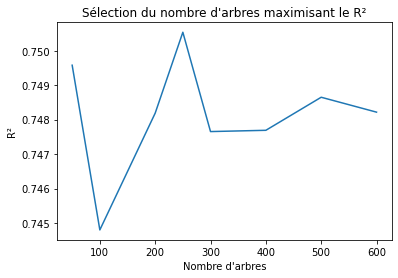

In [24]:
plt.plot(nb_arbres, scores)
plt.xlabel("Nombre d'arbres")
plt.ylabel("R²")
plt.title("Sélection du nombre d'arbres maximisant le R²")
plt.show()

La taille optimale de la forêt est de 250 arbres. Cet hyperparamètre sera fixé lors du gridsearch.

In [25]:
# retourne un array dont les valeurs sont l'inverse du logarithme appliqué sur les données
def inverser(log_y_plus_1):
    return np.expm1(log_y_plus_1)

# retourne le R² calculé sur le jeu de test
def calculer_R2(reg, X_test, y_test):
    y_pred = reg.predict(X_test)
    return round(r2_score(inverser(y_test), inverser(y_pred)), 3)

# retourne la MAE calculée sur le jeu de test
def calculer_MAE(reg, X_test, y_test):
    y_pred = reg.predict(X_test)
    return round(mean_absolute_error(inverser(y_test), inverser(y_pred)), 3)

# retourne la RMSE calculée sur le jeu de test
def calculer_RMSE(reg, X_test, y_test):
    y_pred = reg.predict(X_test)
    return round(mean_squared_error(inverser(y_test), inverser(y_pred), squared=False), 3)

# retourne les résultats de la validation croisée
def realiser_validation_croisee(modele):
    cv_resultats = cross_validate(modele, std_X_conso_train, y_conso_train, cv=5, scoring=metriques)
    cv_resultats['full_time'] = cv_resultats['fit_time'] + cv_resultats['score_time']
    return cv_resultats

# retourne une liste contenant la moyenne de chaque métrique calculée lors de la validation croisée
def calculer_moyennes_metriques(cv_resultats):
    return [cv_resultats['test_r2'].mean(), cv_resultats['test_MAE'].mean(),
            cv_resultats['test_RMSE'].mean(), cv_resultats['full_time'].mean()]

In [26]:
from sklearn import dummy
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# les différentes métriques sur lesquelles les modèles sont comparés
metriques = {'r2': calculer_R2, 'MAE': calculer_MAE, 'RMSE': calculer_RMSE}

# dataframe pour stocker les différentes métriques pour chaque modèle
resultats = pd.DataFrame(columns=['R2', 'MAE', 'RMSE', 'Temps'], 
                         index=['baseline', 'regression_lineaire', 'elastic_net', 
                                'gradient_boosting', 'random_forest'])

# définition des hyperparamètres pour la gridsearch de l'elastic net
n_alphas = 20
alphas = np.logspace(-5, 1, n_alphas)
param_grid_en = {'alpha': alphas, 'l1_ratio': [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]}
score = 'r2' # score sur lequel le gridsearch s'appuiera pour définir le meilleur modèle

# définition des hyperparamètres pour la gridsearch du random forest
nb_arbres = [250] # fixé selon la recherche ci-avant
nb_features = [10, 15, 20, 30, 40, 42] # prendre au minimum 20% du nombre total de features (42) soit 8 au min
profondeur_max = [10, 15, 20, 25]
param_grid_rf = {'n_estimators': nb_arbres, 'max_features': nb_features, 'max_depth': profondeur_max}

# définition des hyperparamètres pour la gridsearch du gradient boosting
nb_arbres = [300, 400, 500, 600, 700]
learning_rates = [0.025, 0.05, 0.1]
profondeur_max = [1, 2, 3, 4, 5]
param_grid_gb = {'n_estimators': nb_arbres, 'max_depth': profondeur_max, 'learning_rate': learning_rates}

dum = dummy.DummyRegressor(strategy='mean')
lr = linear_model.LinearRegression()

# Régression elastic net : le l1_ratio = 0 => revient à un régression Lasso
en = GridSearchCV(
    linear_model.ElasticNet(),
    param_grid_en, # grille des hyperparamètres
    cv=5, # nombre de folds
    scoring=score
).fit(
    std_X_conso_train, 
    y_conso_train
).best_estimator_ # sélectionne le meilleur modèle après le gridsearch

# Random Forest : 400 arbres
rf = GridSearchCV(
    RandomForestRegressor(),
    param_grid_rf, # grille des hyperparamètres
    cv=5, # nombre de folds
    scoring=score
).fit(
    std_X_conso_train, 
    y_conso_train
).best_estimator_ # sélectionne le meilleur modèle après le gridsearch

# Gradient Boosting
gb = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid_gb, # grille des hyperparamètres
    cv=5, # nombre de folds
    scoring=score
).fit(
    std_X_conso_train, 
    y_conso_train
).best_estimator_ # sélectionne le meilleur modèle après le gridsearch

modeles_cv = {'baseline': dum, 'regression_lineaire': lr, 'elastic_net': en, 'random_forest': rf, 'gradient_boosting': gb}

for nom, modele in modeles_cv.items():
    resultats_validation_croisee = realiser_validation_croisee(modele)
    resultats.loc[nom] = calculer_moyennes_metriques(resultats_validation_croisee)

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552.926519163801, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.9714618940567, tolerance: 0.23944314313852422
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545.1818769524307, tolerance: 0.2501634313259428
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coor

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.28698894332683, tolerance: 0.2501634313259428
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.17172263360726, tolerance: 0.2423964079561821
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.356452606615676, tolerance: 0.244757095311255
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coord

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.06978953900921, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.6773711590157, tolerance: 0.23944314313852422
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.8585703278834, tolerance: 0.2501634313259428
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coord

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.76804130934727, tolerance: 0.2423964079561821
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.80641267552642, tolerance: 0.244757095311255
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.195003226137146, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coor

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.55642641037502, tolerance: 0.23944314313852422
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.09511240955283, tolerance: 0.2501634313259428
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.10213139168434, tolerance: 0.2423964079561821
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coor

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.78404346950026, tolerance: 0.2423964079561821
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.34071563533928, tolerance: 0.244757095311255
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553.062197622391, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27734417574606596, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25188834980440333, tolerance: 0.2501634313259428
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553.2138553727569, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30338484989874814, tolerance: 0.2423964079561821
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2866512095424696, tolerance: 0.244757095311255
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554.1696779136627, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_co

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591.3604797438163, tolerance: 0.24315352997869774
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553.5872001429375, tolerance: 0.23944314313852422
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.8530668120424, tolerance: 0.2501634313259428
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coo

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950.993512305545, tolerance: 0.2501634313259428
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 944.4817810594947, tolerance: 0.2423964079561821
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 939.7493694605632, tolerance: 0.244757095311255
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Administrateur\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
 

In [27]:
resultats

,R2,MAE,RMSE,Temps
baseline,-0.0572,7.31694e+06,2.80556e+07,0.00559549
regression_lineaire,-1.22419e+27,4.44761e+19,8.29692e+20,0.291057
elastic_net,-1.45934e+06,1.54112e+09,2.86614e+10,0.152254
gradient_boosting,0.5438,4.18717e+06,1.9683e+07,1.8827
random_forest,0.4696,4.21628e+06,2.13886e+07,2.76984


Le meilleur modèle est le gradient boosting, il a de meilleurs résultats sur le R², la MAE et la RMSE. Il sera donc utilisé pour les prédictions.

In [34]:
en

ElasticNet(alpha=0.5455594781168515, l1_ratio=0)

In [36]:
rf

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=250)

In [35]:
gb

GradientBoostingRegressor(learning_rate=0.025, max_depth=4, n_estimators=400)

In [28]:
# réentraînement sur tout le training set et prédiction sur le test set
gb.fit(std_X_conso_train, y_conso_train)
y_conso_pred = gb.predict(std_X_conso_test)

In [29]:
print("Résultats sur le jeu de test :")
print("R² = {}".format(round(r2_score(inverser(y_conso_test), inverser(y_conso_pred)), 3)))
print("MAE = {}".format(round(mean_absolute_error(inverser(y_conso_test), inverser(y_conso_pred)), 3)))
print("RMSE = {}".format(round(mean_squared_error(inverser(y_conso_test), inverser(y_conso_pred), squared=False), 3)))

Résultats sur le jeu de test :
R² = 0.847
MAE = 3251609.559
RMSE = 7877011.306


## Sur les émissions de GES

Les émissions de GES sont fortement corrélées à la consommation énergétique du bâtiment (R² = 0.88), en effet, aujourd'hui la consommation d'énergie est essentiellement fossile ce qui implique des émissions de GES.

Etant donné que la consommation d'énergie génère des émissions de GES, le modèle sélectionné permettant de prédire la consommation d'énergie sera utilisé pour prédire les émissions de GES.

In [30]:
# entraînement sur tout le training set et prédiction sur le test set
gb.fit(std_X_emissions_train, y_emissions_train)
y_emissions_pred = gb.predict(std_X_emissions_test)

In [31]:
print("Résultats sur le jeu de test :")
print("R² = {}".format(round(r2_score(inverser(y_emissions_test), inverser(y_emissions_pred)), 3)))
print("MAE = {}".format(round(mean_absolute_error(inverser(y_emissions_test), inverser(y_emissions_pred)), 3)))
print("RMSE = {}".format(round(mean_squared_error(inverser(y_emissions_test), inverser(y_emissions_pred), squared=False), 3)))

Résultats sur le jeu de test :
R² = 0.721
MAE = 99.177
RMSE = 424.864


In [32]:
feature_importances = pd.DataFrame()
feature_importances["feature"] = std_X_emissions_train.columns
feature_importances["importance"] = gb.feature_importances_
feature_importances.sort_values(by=["importance"], ascending=True, inplace=True)

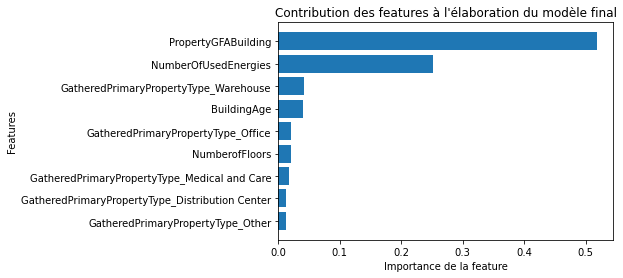

In [33]:
filtre_features_importantes = feature_importances.loc[feature_importances["importance"] >= 0.01, :]
plt.barh(filtre_features_importantes["feature"], filtre_features_importantes["importance"])
plt.xlabel("Importance de la feature")
plt.ylabel("Features")
plt.title("Contribution des features à l'élaboration du modèle final")
plt.show()

## Pertinence de la variable EnergyStar Score

### Sur la consommation d'énergie

In [37]:
# réintroduction de l'EnergyStar Score parmi les features
energy_star_score_train = batiments_data.loc[std_X_conso_train.index]["ENERGYSTARScore"]
energy_star_score_test = batiments_data.loc[std_X_conso_test.index]["ENERGYSTARScore"]
ESS_X_conso_train = pd.concat([std_X_conso_train, energy_star_score_train], axis=1)
ESS_X_conso_test = pd.concat([std_X_conso_test, energy_star_score_test], axis=1)

In [38]:
# suppression des lignes avec Energy Star Score vide
ESS_X_conso_train = ESS_X_conso_train.dropna()
ESS_X_conso_test = ESS_X_conso_test.dropna()

ESS_y_conso_train = y_conso_train.loc[ESS_X_conso_train.index]
ESS_y_conso_test = y_conso_test.loc[ESS_X_conso_test.index]

In [39]:
# réentraînement sur tout le training set et prédiction sur le test set
gb.fit(ESS_X_conso_train, ESS_y_conso_train)
ESS_y_conso_pred = gb.predict(ESS_X_conso_test)

In [40]:
print("Résultats sur le jeu de test :")
print("R² = {}".format(round(r2_score(inverser(ESS_y_conso_test), inverser(ESS_y_conso_pred)), 3)))
print("MAE = {}".format(round(mean_absolute_error(inverser(ESS_y_conso_test), inverser(ESS_y_conso_pred)), 3)))
print("RMSE = {}".format(round(mean_squared_error(inverser(ESS_y_conso_test), inverser(ESS_y_conso_pred), squared=False), 3)))

Résultats sur le jeu de test :
R² = 0.908
MAE = 2241299.969
RMSE = 6382117.707


### Sur les émissions de GES

In [41]:
# réintroduction de l'EnergyStar Score parmi les features
energy_star_score_train = batiments_data.loc[std_X_emissions_train.index]["ENERGYSTARScore"]
energy_star_score_test = batiments_data.loc[std_X_emissions_test.index]["ENERGYSTARScore"]
ESS_X_emissions_train = pd.concat([std_X_emissions_train, energy_star_score_train], axis=1)
ESS_X_emissions_test = pd.concat([std_X_emissions_test, energy_star_score_test], axis=1)

In [42]:
# suppression des lignes avec Energy Star Score vide
ESS_X_emissions_train = ESS_X_emissions_train.dropna()
ESS_X_emissions_test = ESS_X_emissions_test.dropna()

ESS_y_emissions_train = y_emissions_train.loc[ESS_X_emissions_train.index]
ESS_y_emissions_test = y_emissions_test.loc[ESS_X_emissions_test.index]

In [43]:
# réentraînement sur tout le training set et prédiction sur le test set
gb.fit(ESS_X_emissions_train, ESS_y_emissions_train)
ESS_y_emissions_pred = gb.predict(ESS_X_emissions_test)

In [44]:
print("Résultats sur le jeu de test :")
print("R² = {}".format(round(r2_score(inverser(ESS_y_emissions_test), inverser(ESS_y_emissions_pred)), 3)))
print("MAE = {}".format(round(mean_absolute_error(inverser(ESS_y_emissions_test), inverser(ESS_y_emissions_pred)), 3)))
print("RMSE = {}".format(round(mean_squared_error(inverser(ESS_y_emissions_test), inverser(ESS_y_emissions_pred), 
                                                  squared=False), 3)))

Résultats sur le jeu de test :
R² = 0.905
MAE = 79.198
RMSE = 239.903
